$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\argmin}{argmin}$
$\DeclareMathOperator{\argmax}{argmax}$
$\DeclareMathOperator{\grad}{grad}$
$\DeclareMathOperator{\tr}{tr}$
$\DeclareMathOperator{\exp}{exp}$

# Снижение размерности

## MNIST 
Рукописные изображения цифр от 0 до 10.

(1797, 64)


<Figure size 640x480 with 0 Axes>

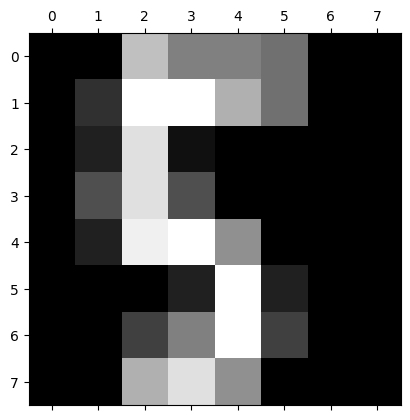

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[25])
plt.show()

Разобьем на обучение и валидацию

In [2]:
from sklearn.model_selection import train_test_split

all_x = digits.images.reshape(digits.images.shape[0], -1)
all_y = digits.target

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


## KNN

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN

n_neighbors = [1, 2, 3, 4, 5, 10]

knn = GridSearchCV(KNN(), param_grid={'n_neighbors': n_neighbors}, n_jobs=-1, scoring='accuracy')
knn.fit(x_train, y_train)

predicted = knn.best_estimator_.predict(x_test)
print('KNN best params:', knn.best_params_)
print('KNN:', accuracy_score(y_test, predicted))

KNN best params: {'n_neighbors': 1}
KNN: 0.9777777777777777


Нормализируем все данные

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_scaled = GridSearchCV(KNN(), param_grid={'n_neighbors': n_neighbors}, n_jobs=-1, scoring='accuracy')
knn_scaled.fit(x_train_scaled, y_train)

predicted = knn_scaled.predict(x_test_scaled)
print('KNN best params:', knn_scaled.best_params_)
print('KNN on scaled:', accuracy_score(y_test, predicted))

KNN best params: {'n_neighbors': 3}
KNN on scaled: 0.9694444444444444


In [5]:
from sklearn.preprocessing import StandardScaler, Normalizer
normalizer = Normalizer().fit(x_train)

x_train_normalized = normalizer.transform(x_train)
x_test_normalized = normalizer.transform(x_test)

knn_normalized = GridSearchCV(KNN(), param_grid={'n_neighbors': n_neighbors}, n_jobs=-1, scoring='accuracy')
knn_normalized.fit(x_train_normalized, y_train)

predicted = knn_normalized.predict(x_test_normalized)
print('KNN best params:', knn_normalized.best_params_)
print('KNN on scaled:', accuracy_score(y_test, predicted))

KNN best params: {'n_neighbors': 1}
KNN on scaled: 0.9833333333333333


NB: вообще, для того чтобы сделать два шага как один, в scikit-learn есть специальный класс [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). 

## Метод главных компонент
Метод клавных компонент (Principal Component Analysis) — линейный метод понижения размерности.

### Идея 
Давайте найдем такое линейное многообразие (прямую, плоскость, ...), чтобы сумма отклонений точек из датасета до него была минимальна.

Статитически, это можно интерпритировать, как выбор направлений, дисперсия проекций на которые максимальна.

С точки зрения линейной алгебры, такое многообразие может быть найдено из сингулярного разложения матрицы, у которой в строках записаны координаты исходных точек

### Сингулярное разложение (Singluar Value Decomposition — SVD).
Пусть $A$ — некоторая вещественная $m\times n$ матрица, 
$V, U$ — две ортогональные матрицы размеров $m\times m$ и $n\times n$ соответственно,
$\Sigma$ — диагональная матрица размера $m\times n$ с неотрицательные элементами на диагонали, расположенные по невозрастанию.

$$\Sigma = \begin{pmatrix}
    \sigma_1 & 0 & 0 & \ldots & 0 & 0\\
    0 & \sigma_2 & 0 & \ldots & 0 & 0\\
    & & \ldots \\
    0 & \ldots & 0 & \sigma_m & 0 & 0
\end{pmatrix}, \sigma_1\geqslant \sigma_2 \geqslant \ldots \sigma_m\geqslant 0.
$$

*(Матрица $A$ называется ортогональной, если $AA^T = E$)*

Если выполняется равенство $A = V\Sigma U^T$,
то матрицы $V$, $\Sigma$ и $U$ образуют *сингулярное разложение* матрицы $A$, 

Матрицы $V, U$ состоят из левых и правых соответсвенно *синулярных векторов* матрицы $A$, 
числа $\sigma_i$ называюся *сингулярными числами* матрицы $A$.


Квадраты сингулярных чисел матрицы $A$ могут быть найдены как собственные числа матрицы $AA^T$, а левые и правые сингулряные векторы — как собственные векторы матриц $AA^T$ и $A^TA$ соответственно. 


### Выбор числа компонент
#### Правило Кайзера
Выбираем собственные числа, удовлтворяющие условию
$$
    \sigma_i \geqslant \frac{1}{n}\tr A
$$

Также есть и другие способы, например Правило сломанной трости или с помощью чисел обусловенности

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(x_train)

x_train_after_pca = pca.transform(x_train)
x_test_after_pca = pca.transform(x_test)

knn_pca = GridSearchCV(KNN(), param_grid={'n_neighbors': n_neighbors}, n_jobs=-1, scoring='accuracy')
knn_pca.fit(x_train_after_pca, y_train)

predicted = knn_pca.best_estimator_.predict(x_test_after_pca)
print('KNN with PCA best params:', knn_pca.best_params_)
print('KNN with PCA:', accuracy_score(y_test, predicted))

KNN with PCA best params: {'n_neighbors': 1}
KNN with PCA: 0.9833333333333333


### Плюсы и минусы PCA
- выучивает преобразование данных, которое может быть применено к новым данным
- можно разменять качество на скорость, выбрав нужное число компонент

- является линейным преобразованием, достаточно ограниченная выразимость

##  t-distributed Stochastic Neighbor Embedding, t-SNE

### Идея
Давайте попробуем построить такое отображение, которое близкие точки будет отображать в близкие точки, а далекие — в далекие.

### Детали
Пусть даны точки $x_1, x_2, \ldots, x_n$, хотим получить точки $y_1, y_2, \ldots, y_n$.

Определим похожесть точек $x_i$ и $x_j, (i\neq j)$ как
$$
p_{j|i} = \cfrac{e^{-\frac{\lVert x_i - x_j\rVert^2}{2\sigma_i^2}}}{\sum\limits_{k\neq i}e^{-\frac{\lVert x_i - x_k\rVert^2}{2\sigma_i^2}}}.
$$

Положим
$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}.$$

$\sigma_i$ подбирается под данные, при этом в более плотных областях она оказывается меньше, а в более разреженных — больше.


На искомых точках определим похожесть как 

$$
{\displaystyle q_{ij}={\frac {(1+\lVert {y} _{i}-{y} _{j}\rVert ^{2})^{-1}}{\sum\limits_{k\neq l}(1+\lVert  {y} _{k}- {y} _{l}\rVert ^{2})^{-1}}}}
$$.

Точки получаются минимиируя дивергенцию Кульбака-Лейбнера между распредлениями $p$ и $q$.

### Дивергенция Кульбака-Лейбнера

Пусть $P$ и $Q$ - два дискретны вероятностных распределения, принимающие значения в множестве $\mathcal {X}.$

$${\displaystyle D_{\text{KL}}(P\parallel Q)=\sum _{x\in {\mathcal {X}}}P(x)\log \left({\frac {P(x)}{Q(x)}}\right)}$$


Свойства:
1) $D_{\text{KL}}(P\parallel Q) \geqslant 0$ 
2) $D_{\text{KL}}(P\parallel Q) = 0 \Leftrightarrow P = Q$ (почти всюду)

Неформально, $D_{\text{KL}}(P\parallel Q)$ равна потере информации при замене распределния $P$ на $Q$.

### t-SNE и MNIST

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_transformed = tsne.fit_transform(x_train)

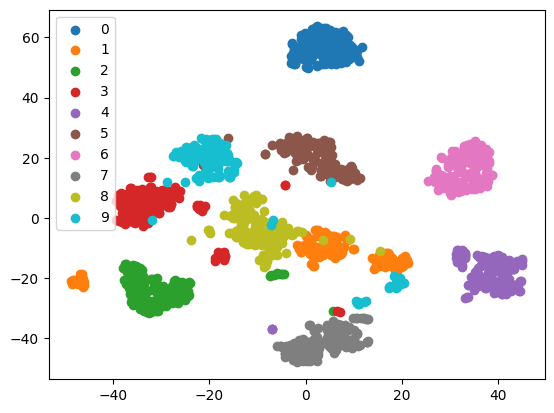

In [20]:
for digit in range(10):
    mask = y_train == digit
    plt.scatter(x_transformed[mask, 0], x_transformed[mask, 1], label=str(digit))
    
plt.legend()

## UMap
Использует похожую идею из $t-SNE$, но мы не будем разбирать подробно

## Ссылки
1. van der Maaten L.J.P., Hinton G.E. Visualizing Data Using t-SNE // Journal of Machine Learning Research. — 2008. — Ноябрь (т. 9). [Ссылка](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
2. [Презентация](https://speakerdeck.com/lmcinnes/umap-uniform-manifold-approximation-and-projection-for-dimension-reduction?slide=16) автора алгоритма Umap